In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df1 = df.drop(['Id'],axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df1.value_counts(['Species'])

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
def get_null_counts(df):
    null_count_df = pd.DataFrame((df.isnull().sum()).sort_values(ascending=False).reset_index())
    null_count_df.columns = ['column_name','null_counts']
    null_count_df = null_count_df.query("column_name!='Outcome'")
    return null_count_df

null_= get_null_counts(df1)
null_.style.background_gradient(cmap='YlOrRd')

,column_name,null_counts
0,SepalLengthCm,0
1,SepalWidthCm,0
2,PetalLengthCm,0
3,PetalWidthCm,0
4,Species,0


<AxesSubplot: ylabel='Species'>

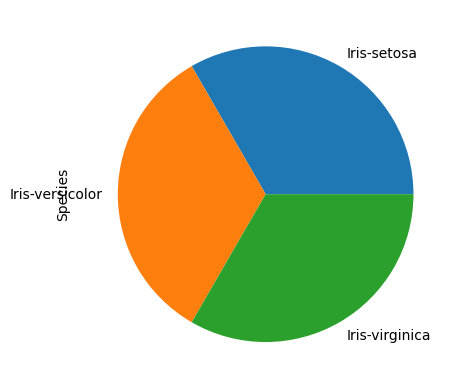

In [12]:
df1.groupby('Species')['Species'].count().plot(kind='pie')

array([[<AxesSubplot: title={'center': 'SepalLengthCm'}>,
        <AxesSubplot: title={'center': 'SepalWidthCm'}>],
       [<AxesSubplot: title={'center': 'PetalLengthCm'}>,
        <AxesSubplot: title={'center': 'PetalWidthCm'}>]], dtype=object)

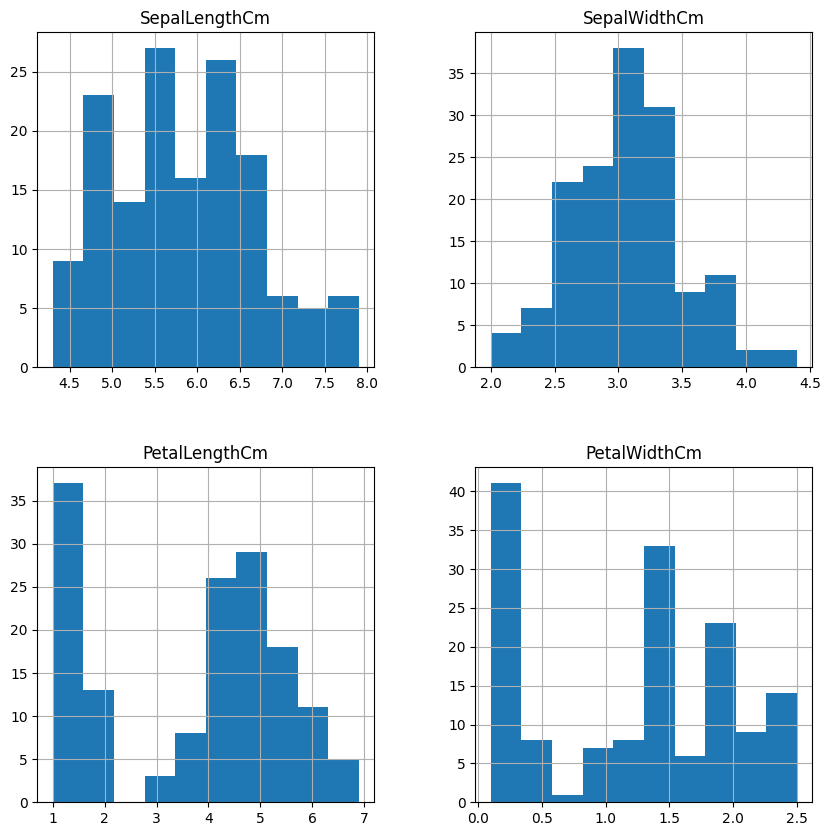

In [16]:
df1.hist(figsize=(10,10))

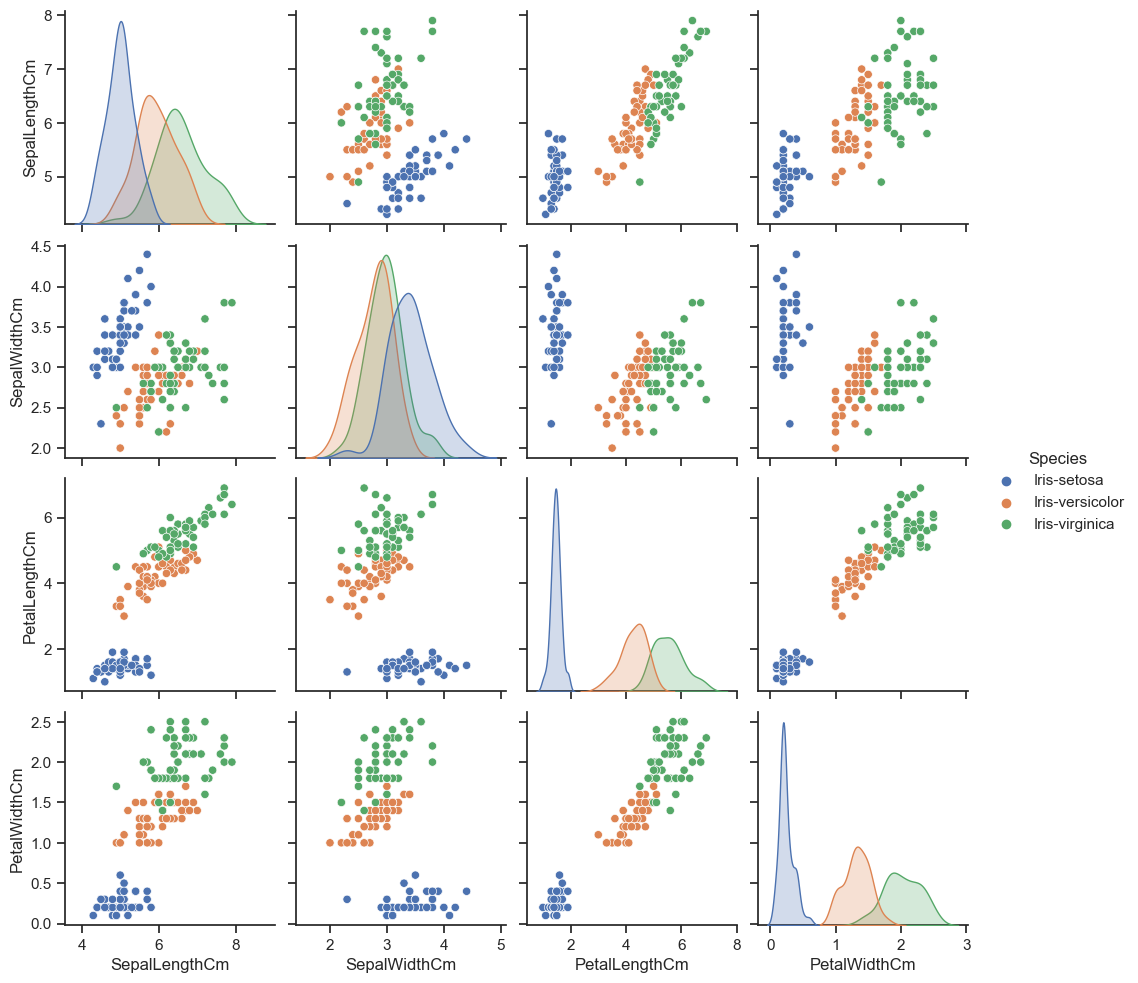

In [17]:
sns.set_theme(style="ticks")
sns.pairplot(df1, hue="Species")

initial assumption both knn and RF would work but RF will guve better result

KNN time

C:\Users\shara\AppData\Local\Temp\ipykernel_12940\468850935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df1.corr(),annot=True)


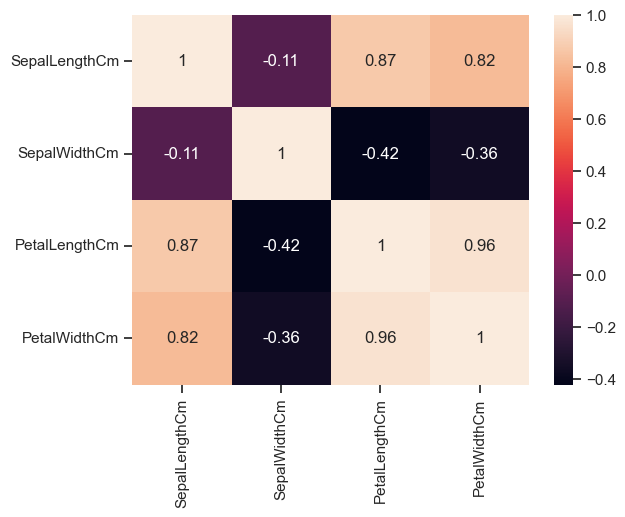

In [18]:
ax = sns.heatmap(df1.corr(),annot=True)

<AxesSubplot: >

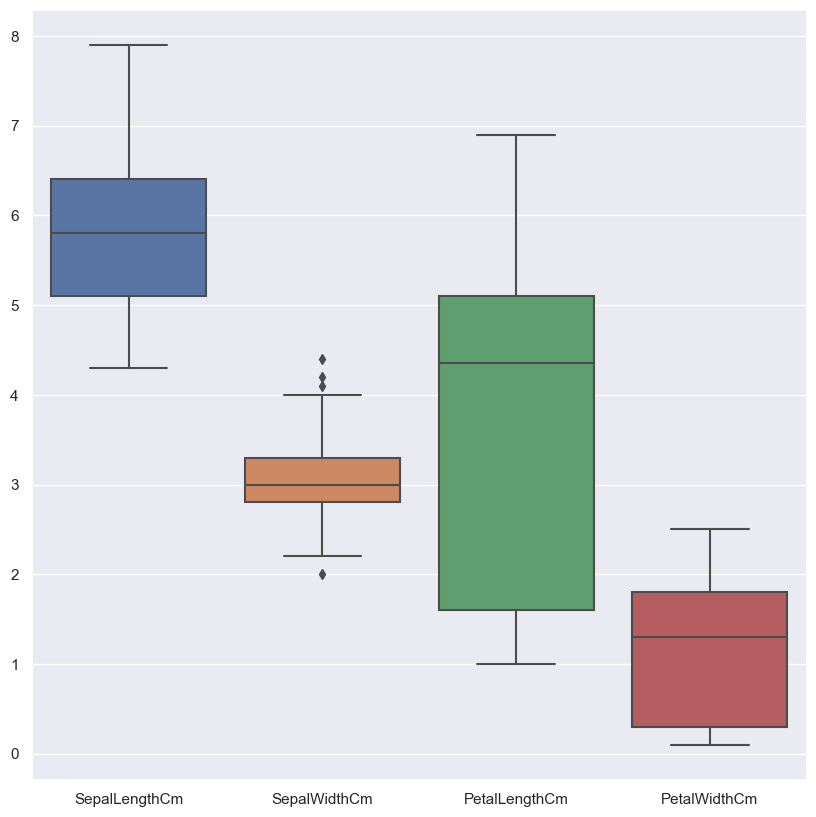

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(df1)

In [24]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 4 numerical variables

The numerical variables : ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [26]:
for i in range(0,len(numerical)):
    IQR = df1['{}'.format(numerical[i])].quantile(0.75) - df1['{}'.format(numerical[i])].quantile(0.25)
    Lower = df1['{}'.format(numerical[i])].quantile(0.25) - (IQR * 3)
    Upper = df1['{}'.format(numerical[i])].quantile(0.75) + (IQR * 3)
    print('{name} outliers are values < {lowerboundary} or > {upperboundary}'.format(name=str(numerical[i]),lowerboundary=Lower, upperboundary=Upper))

SepalLengthCm outliers are values < 1.1999999999999975 or > 10.300000000000002
SepalWidthCm outliers are values < 1.2999999999999998 or > 4.8
PetalLengthCm outliers are values < -8.899999999999999 or > 15.599999999999998
PetalWidthCm outliers are values < -4.2 or > 6.3


In [27]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


no outliers!

In [28]:
X = df1.drop(['Species'],axis=1)
y = df1.Species

In [29]:
X.shape,y.shape

((150, 4), (150,))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [35]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,12)
#29 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

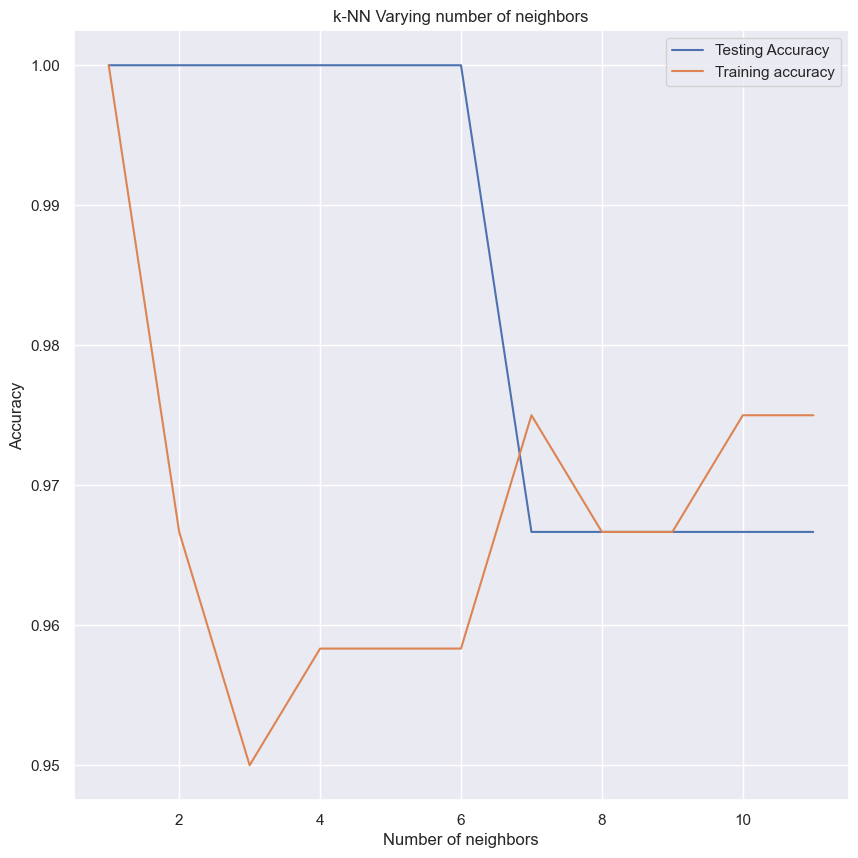

In [36]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

k=3 is best

In [37]:
test_accuracy_list = test_accuracy.tolist()
for i in range(0,len(test_accuracy_list)):
    print(i+1,test_accuracy_list[i])

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 0.9666666666666667
8 0.9666666666666667
9 0.9666666666666667
10 0.9666666666666667
11 0.9666666666666667


choosing k = 6

In [38]:
knn = KNeighborsClassifier(n_neighbors=6)

#Fit the model
knn.fit(X_train, y_train)
    
#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
    
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

print('Training accuracy: ',train_accuracy)
print('\nTesting accuracy: ',test_accuracy)

Training accuracy:  0.9583333333333334

Testing accuracy:  1.0


In [39]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best Score:0.9666666666666668
Best Parameters: {'n_neighbors': 3}


In [41]:
y_pred_test = knn_cv.predict(X_test)
y_pred_test

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [44]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:2f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('\nClassification error : {0:2f}'.format(classification_error))

precision = TP / float(TP + FP)
print('\nPrecision : {0:2f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall or Sensitivity : {0:2f}'.format(recall))

specificity = TN / (TN + FP)
print('\nSpecificity : {0:2f}'.format(specificity))

true_positive_rate = TP / float(TP + FN)
print('\nTrue Positive Rate : {0:2f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('\nFalse Positive Rate : {0:2f}'.format(false_positive_rate))

Classification accuracy : 1.000000

Classification error : 0.000000

Precision : 1.000000

Recall or Sensitivity : 1.000000

Specificity : 1.000000

True Positive Rate : 1.000000

False Positive Rate : 0.000000
